In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import svm

In [2]:
shakes_df = pd.read_csv('./shakespeare-plays/Shakespeare_data.csv')

In [3]:
shakes_df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [4]:
shakes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111389 non-null object
PlayerLine          111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [5]:
shakes_df.Player.unique()

array([nan, 'KING HENRY IV', 'WESTMORELAND', 'FALSTAFF', 'PRINCE HENRY',
       'POINS', 'EARL OF WORCESTER', 'NORTHUMBERLAND', 'HOTSPUR',
       'SIR WALTER BLUNT', 'First Carrier', 'Ostler', 'Second Carrier',
       'GADSHILL', 'Chamberlain', 'BARDOLPH', 'PETO', 'First Traveller',
       'Thieves', 'Travellers', 'LADY PERCY', 'Servant', 'FRANCIS',
       'Vintner', 'Hostess', 'Sheriff', 'Carrier', 'MORTIMER',
       'GLENDOWER', 'EARL OF DOUGLAS', 'Messenger', 'VERNON', 'WORCESTER',
       'ARCHBISHOP OF YORK', 'SIR MICHAEL', 'LANCASTER', 'BEDFORD',
       'GLOUCESTER', 'EXETER', 'OF WINCHESTER', 'CHARLES', 'ALENCON',
       'REIGNIER', 'BASTARD OF ORLEANS', 'JOAN LA PUCELLE',
       'First Warder', 'Second Warder', 'WOODVILE', 'Mayor', 'Officer',
       'Boy', 'SALISBURY', 'TALBOT', 'GARGRAVE', 'GLANSDALE', 'Sergeant',
       'First Sentinel', 'BURGUNDY', 'Sentinels', 'Soldier', 'Captain',
       'OF AUVERGNE', 'Porter', 'PLANTAGENET', 'SUFFOLK', 'SOMERSET',
       'WARWICK', 'Lawye

In [6]:
# Based on initial observation, I assume that it is necessary to discard the rows that have no Player data
# This is because we don't want our model to learn NaN as an answer
# The model should only answer concrete characters in the play

In [7]:
# Now I want to see what type of data there are in the rows that NaN in Player
# I want to do this to see which data I would lose if I drop these rows

In [8]:
shakes_df[shakes_df.Player.isna()]

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
2015,2016,Henry IV,10.0,NaN,NaN,Eastcheap. The Boar's-Head Tavern.
2016,2017,Henry IV,10.0,NaN,NaN,Enter FALSTAFF and BARDOLPH
29459,29460,Cymbeline,7.0,2.2.55,NaN,An ante-chamber adjoining Imogen's apartments.
29460,29461,Cymbeline,7.0,NaN,NaN,Enter CLOTEN and Lords


In [9]:
# So far I believe that I should drop all of these rows, they do not provide any useful data to guessing the character
# If we do this then we drop all the rows in PlayerLineNumber that are NaN too

In [10]:
# Now I want to see which kind of data there is in the rows that have NaN values for ActSceneLine 
# Maybe there is something useful there to predict the character
# I still want to make sure that there isn't a lot of NaN values for Players within this subset of the dataframe

In [11]:
shakes_df[shakes_df.ActSceneLine.isna() & shakes_df.Player.isna()]

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
2015,2016,Henry IV,10.0,NaN,NaN,Eastcheap. The Boar's-Head Tavern.
2016,2017,Henry IV,10.0,NaN,NaN,Enter FALSTAFF and BARDOLPH
29460,29461,Cymbeline,7.0,NaN,NaN,Enter CLOTEN and Lords


In [151]:
# There are only 6 NaN Players within this subset, therefore I will leave the ActSceneLine nan rows in its place

In [13]:
shakes_df.dropna(subset=['Player'], inplace=True)

In [14]:
# Also it would be useful to hotshot encode the Play 
# For this we would need to find out how many plays there are

shakes_df.Play.unique()

In [15]:
shakes_corr = shakes_df.corr()

In [16]:
mask = np.zeros_like(shakes_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

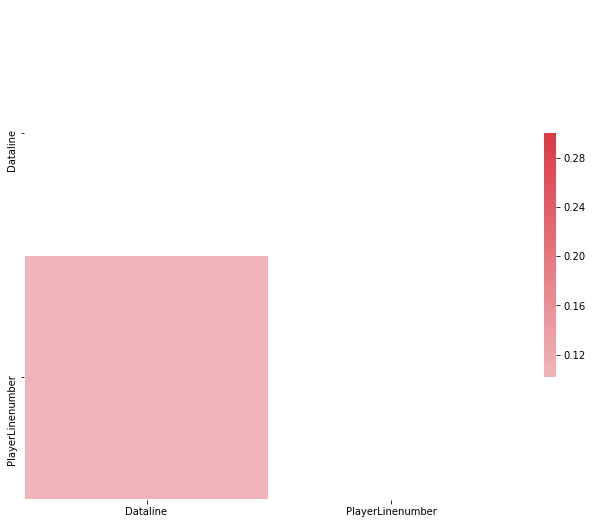

In [17]:
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(shakes_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
# At this point, plotting a correlation graph is not useful at all, I need to fix the data more
# Some ideas that I have are to get the PlayerLine length for a column and also the amount of words in each line.
# Also to perform some sort of oneshot enconding in the Play column
# I still need to come up with ways how to take advantage of the PlayerLineNumber and the ActSceneLineNumber columns
# Maybe some sentiment analysis on the line column would help a lot
# If there would be a way to extract special words each character uses, that would help a ton more, I need to figure out if I can do this

In [19]:
shakes_df.head(10)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil
8,9,Henry IV,1.0,1.1.6,KING HENRY IV,Shall daub her lips with her own children's bl...
9,10,Henry IV,1.0,1.1.7,KING HENRY IV,"Nor more shall trenching war channel her fields,"
10,11,Henry IV,1.0,1.1.8,KING HENRY IV,Nor bruise her flowerets with the armed hoofs
11,12,Henry IV,1.0,1.1.9,KING HENRY IV,"Of hostile paces: those opposed eyes,"
12,13,Henry IV,1.0,1.1.10,KING HENRY IV,"Which, like the meteors of a troubled heaven,"


In [20]:
# I will remove the Dataline column since it provides no meaningful information

In [21]:
shakes_df.drop(columns=['Dataline'], inplace=True)

In [22]:
shakes_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [23]:
shakes_df.reset_index(drop=True, inplace=True)

In [24]:
# After resetting the index I want to add a column that contains the length of each PlayerLine

In [25]:
shakes_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
1,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
2,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
3,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
4,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [26]:
shakes_df['LineLength'] = shakes_df.PlayerLine.apply(len)

In [27]:
# I will review what the dataframe looks like after performing the operation
shakes_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,LineLength
0,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",38
1,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",42
2,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,46
3,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,39
4,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,41


In [28]:
shakes_df.dtypes

Play                 object
PlayerLinenumber    float64
ActSceneLine         object
Player               object
PlayerLine           object
LineLength            int64
dtype: object

In [29]:
# What unique values are there in PlayerLinenumber?
shakes_df.PlayerLinenumber.unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [30]:
# All of the unique values in PlayerLinenumber are integers that are in str form
# Therefore, I will cast them to int form
shakes_df.PlayerLinenumber = shakes_df.PlayerLinenumber.apply(int)

In [31]:
shakes_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,LineLength
0,Henry IV,1,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",38
1,Henry IV,1,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",42
2,Henry IV,1,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,46
3,Henry IV,1,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,39
4,Henry IV,1,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,41


In [32]:
# I want to create a new column that holds the sentiment of each row in the PlayerLine

import nltk

In [33]:
sentence = 'So shaken as we are, so wan with care,'

In [34]:
tokens = nltk.word_tokenize(sentence)

In [35]:
tokens

['So', 'shaken', 'as', 'we', 'are', ',', 'so', 'wan', 'with', 'care', ',']

In [36]:
# We can use work_tokenize function from nltk to count the amount of words that each character has
# I think that the amount of word each character has should make a difference

In [37]:
len(tokens)

11

In [38]:
shakes_df['WordCount'] = shakes_df.PlayerLine.apply(nltk.word_tokenize).apply(len)

In [39]:
shakes_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,LineLength,WordCount
0,Henry IV,1,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",38,11
1,Henry IV,1,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",42,10
2,Henry IV,1,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,46,7
3,Henry IV,1,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,39,8
4,Henry IV,1,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,41,8


In [40]:
# Ok, this looks good. Now I want to analyze the sentiment of each line.
# I will analyze it into three categories: positive, negative and neutral.

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()

In [42]:
sia.polarity_scores('No more the thirsty entrance of this soil')

{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}

In [43]:
# With a similar strategy I can attempt to get the sentiment analysis of each line

In [44]:
sa_results = shakes_df.PlayerLine.apply(sia.polarity_scores)

In [45]:
sa_results.head()

0    {'neg': 0.132, 'neu': 0.581, 'pos': 0.287, 'co...
1    {'neg': 0.202, 'neu': 0.504, 'pos': 0.294, 'co...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'comp...
Name: PlayerLine, dtype: object

In [46]:
sa_results[0]['neg']

0.132

In [47]:
sa_results = pd.DataFrame.from_records(sa_results)

In [48]:
sa_results.head()

,compound,neg,neu,pos
0,0.4349,0.132,0.581,0.287
1,0.2732,0.202,0.504,0.294
2,0.0000,0.000,1.000,0.000
3,0.0000,0.000,1.000,0.000
4,-0.2960,0.239,0.761,0.000


In [49]:
sa_results['Sentiment'] = 0
sa_results.loc[sa_results['compound'] > 0.2, 'Sentiment'] = 1
sa_results.loc[sa_results['compound'] < -0.2, 'Sentiment'] = -1

In [50]:
sa_results.head()

,compound,neg,neu,pos,Sentiment
0,0.4349,0.132,0.581,0.287,1
1,0.2732,0.202,0.504,0.294,1
2,0.0000,0.000,1.000,0.000,0
3,0.0000,0.000,1.000,0.000,0
4,-0.2960,0.239,0.761,0.000,-1


In [51]:
shakes_df['LineSent'] = sa_results.Sentiment.copy()

In [52]:
shakes_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,LineLength,WordCount,LineSent
0,Henry IV,1,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",38,11,1
1,Henry IV,1,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",42,10,1
2,Henry IV,1,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,46,7,0
3,Henry IV,1,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,39,8,0
4,Henry IV,1,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,41,8,-1


In [53]:
# I want to look at a histogram of the line sentiment to know if it makes any difference

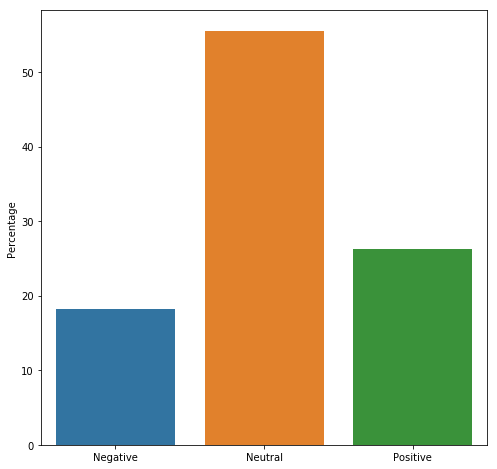

In [54]:
fig, ax = plt.subplots(figsize=(8,8))

counts = shakes_df.LineSent.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.show()

In [55]:
# Almost 60% of the sentiment is neutral, which might not be too useful
# However, we can still keep this feature since it's not too bad
# My guess is that the nltk algortihm isn't calibrated for the english that shakespeare uses
# Another thing to consider is the range that we used to determine
# the sentiment based on the compound sentiment
# If we expand this range then we can get a better distributed plot
# Also, nltk uses a general lexicon to classify text, if we can
# find a more specific lexicon to shakespeare's era english then we can
# perform a better guess of the sentiment

In [56]:
shakes_df.Play.unique()

array(['Henry IV', 'Henry VI Part 1', 'Henry VI Part 2',
       'Henry VI Part 3', 'Alls well that ends well', 'As you like it',
       'Antony and Cleopatra', 'A Comedy of Errors', 'Coriolanus',
       'Cymbeline', 'Hamlet', 'Henry V', 'Henry VIII', 'King John',
       'Julius Caesar', 'King Lear', 'Loves Labours Lost', 'macbeth',
       'Measure for measure', 'Merchant of Venice',
       'Merry Wives of Windsor', 'A Midsummer nights dream',
       'Much Ado about nothing', 'Othello', 'Pericles', 'Richard II',
       'Richard III', 'Romeo and Juliet', 'Taming of the Shrew',
       'The Tempest', 'Timon of Athens', 'Titus Andronicus',
       'Troilus and Cressida', 'Twelfth Night', 'Two Gentlemen of Verona',
       'A Winters Tale'], dtype=object)

In [152]:
# I want to encode this categorical label into a numerical one

In [58]:
# Also something that I've been thinking about is on how to randomize the data
# Right noe all the data is packed in groups determined by the Play
# However, when testing the model, the input data won't always come in group of Plays
# Therefore, I will mix the rows so that the model does not pickup the idea of these groups

In [59]:
shakes_df.Play.value_counts()

Hamlet                      4244
Coriolanus                  3992
Cymbeline                   3956
Richard III                 3941
Antony and Cleopatra        3862
King Lear                   3766
Othello                     3762
Troilus and Cressida        3711
A Winters Tale              3489
Henry VIII                  3419
Henry V                     3395
Henry VI Part 2             3334
Romeo and Juliet            3313
Henry IV                    3200
Henry VI Part 3             3138
Alls well that ends well    3083
Measure for measure         2998
Loves Labours Lost          2986
Henry VI Part 1             2983
Richard II                  2937
Merry Wives of Windsor      2831
As you like it              2822
Taming of the Shrew         2806
Merchant of Venice          2802
Julius Caesar               2771
King John                   2766
Titus Andronicus            2726
Much Ado about nothing      2704
Timon of Athens             2662
Twelfth Night               2648
Pericles  

In [60]:
# I was considering using one-hot encoding for the Play column; however, this would expand the dimensions too greatly
# I am considering using label encoding; however, I worry that this might introduce some noise into the model
# Helpful link: https://pbpython.com/categorical-encoding.html

In [61]:
# I will focus on performing a visual analysis to develop my skills in that area

In [62]:
shakes_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,LineLength,WordCount,LineSent
0,Henry IV,1,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",38,11,1
1,Henry IV,1,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",42,10,1
2,Henry IV,1,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,46,7,0
3,Henry IV,1,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,39,8,0
4,Henry IV,1,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,41,8,-1


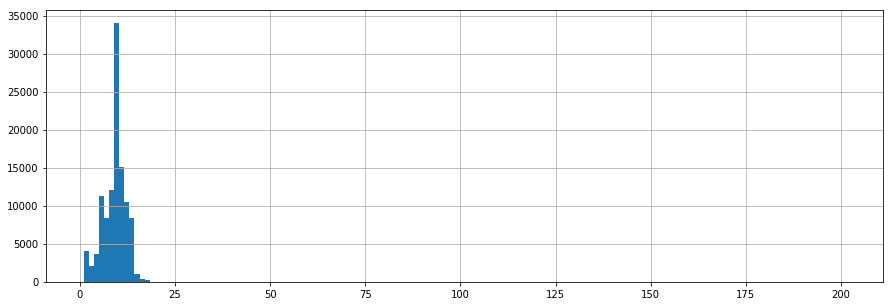

In [63]:
shakes_df.WordCount.hist(bins=150, figsize=(15,5))

In [64]:
shakes_df.WordCount.value_counts()

10     17633
9      16427
11     15075
8      12084
12     10486
7       8378
6       6281
13      5744
5       4987
4       3605
14      2662
2       2314
3       2032
1       1770
15      1090
16       407
17       158
18        62
19        31
20        24
21        14
22        12
25         9
23         9
28         8
24         8
34         8
31         5
43         5
27         5
37         5
26         5
29         5
35         4
41         4
36         4
33         2
61         2
32         2
44         2
49         2
39         2
46         2
66         1
67         1
47         1
55         1
173        1
149        1
40         1
42         1
201        1
85         1
38         1
92         1
80         1
30         1
63         1
Name: WordCount, dtype: int64

In [65]:
# There are 3 values above 100 which are messing with the graph, I will ignore them just for the graphic

In [66]:
shakes_df.WordCount.value_counts().values < 100

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [67]:
shakes_df.WordCount.value_counts().loc[shakes_df.WordCount.value_counts().index < 100].index
# We get the wordcount lengths that are less than 100 to avoid the outliers

Int64Index([10,  9, 11,  8, 12,  7,  6, 13,  5,  4, 14,  2,  3,  1, 15, 16, 17,
            18, 19, 20, 21, 22, 25, 23, 28, 24, 34, 31, 43, 27, 37, 26, 29, 35,
            41, 36, 33, 61, 32, 44, 49, 39, 46, 66, 67, 47, 55, 40, 42, 85, 38,
            92, 80, 30, 63],
           dtype='int64')

In [68]:
filtered_df = shakes_df.loc[shakes_df.WordCount.isin(shakes_df.WordCount.value_counts().loc[shakes_df.WordCount.value_counts().index < 100].index)].copy()

In [69]:
filtered_df.WordCount.value_counts()

10    17633
9     16427
11    15075
8     12084
12    10486
7      8378
6      6281
13     5744
5      4987
4      3605
14     2662
2      2314
3      2032
1      1770
15     1090
16      407
17      158
18       62
19       31
20       24
21       14
22       12
25        9
23        9
24        8
28        8
34        8
26        5
31        5
43        5
27        5
37        5
29        5
35        4
36        4
41        4
46        2
32        2
33        2
49        2
39        2
61        2
44        2
30        1
55        1
66        1
67        1
47        1
40        1
42        1
38        1
92        1
85        1
80        1
63        1
Name: WordCount, dtype: int64

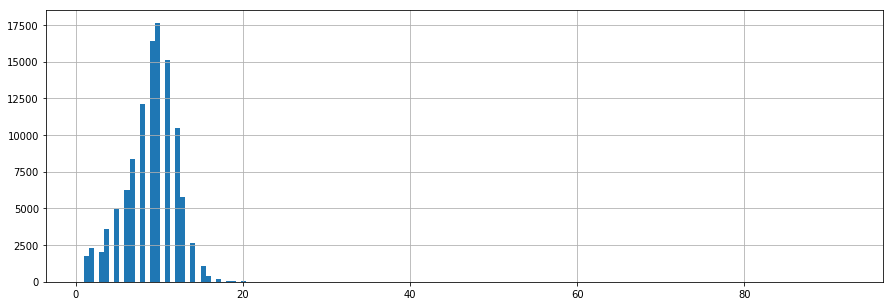

In [70]:
filtered_df.WordCount.hist(bins=150, figsize=(15,5))

In [71]:
# We still have some outliers, we will drop any wordcount that has less than 10 values in its group

In [72]:
filtered_df = filtered_df.loc[filtered_df.WordCount.isin(filtered_df.WordCount.value_counts().loc[filtered_df.WordCount.value_counts().values > 10].index)].copy()

In [73]:
filtered_df.WordCount.value_counts()

10    17633
9     16427
11    15075
8     12084
12    10486
7      8378
6      6281
13     5744
5      4987
4      3605
14     2662
2      2314
3      2032
1      1770
15     1090
16      407
17      158
18       62
19       31
20       24
21       14
22       12
Name: WordCount, dtype: int64

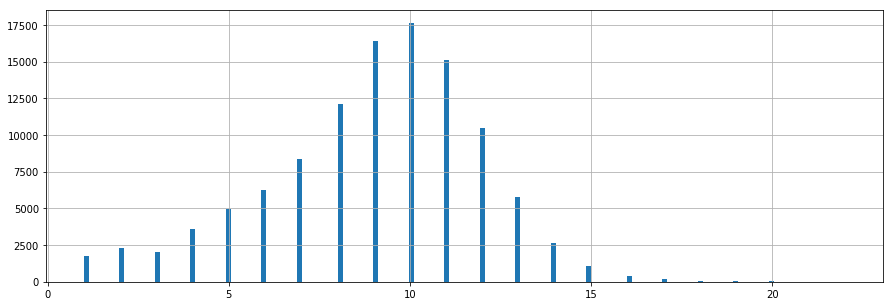

In [74]:
filtered_df.WordCount.hist(bins=150, figsize=(15,5))

In [75]:
# From this graph we can see that most of the word counts are between 7 and 12

In [76]:
shakes_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,LineLength,WordCount,LineSent
0,Henry IV,1,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",38,11,1
1,Henry IV,1,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",42,10,1
2,Henry IV,1,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,46,7,0
3,Henry IV,1,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,39,8,0
4,Henry IV,1,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,41,8,-1


In [77]:
# I will drop the PlayerLine column since it does not provide much data that my model will be able to understand

In [78]:
ready_df = shakes_df.drop(['PlayerLine'], axis=1).copy()

In [79]:
ready_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,LineLength,WordCount,LineSent
0,Henry IV,1,1.1.1,KING HENRY IV,38,11,1
1,Henry IV,1,1.1.2,KING HENRY IV,42,10,1
2,Henry IV,1,1.1.3,KING HENRY IV,46,7,0
3,Henry IV,1,1.1.4,KING HENRY IV,39,8,0
4,Henry IV,1,1.1.5,KING HENRY IV,41,8,-1


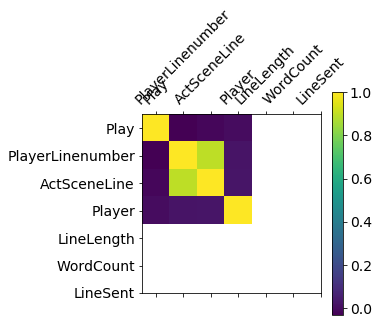

In [80]:
plt.matshow(ready_df.corr())
plt.xticks(range(ready_df.shape[1]), ready_df.columns, fontsize=14, rotation=45)
plt.yticks(range(ready_df.shape[1]), ready_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [82]:
ready_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111389 entries, 0 to 111388
Data columns (total 7 columns):
Play                111389 non-null object
PlayerLinenumber    111389 non-null int64
ActSceneLine        105152 non-null object
Player              111389 non-null object
LineLength          111389 non-null int64
WordCount           111389 non-null int64
LineSent            111389 non-null int64
dtypes: int64(4), object(3)
memory usage: 5.9+ MB


In [83]:
# There are some missing values in ActSceneLine, I will fill them with 0.0.0 to keep that data in the model

In [84]:
ready_df.ActSceneLine.fillna('0.0.0', inplace=True)

In [85]:
ready_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111389 entries, 0 to 111388
Data columns (total 7 columns):
Play                111389 non-null object
PlayerLinenumber    111389 non-null int64
ActSceneLine        111389 non-null object
Player              111389 non-null object
LineLength          111389 non-null int64
WordCount           111389 non-null int64
LineSent            111389 non-null int64
dtypes: int64(4), object(3)
memory usage: 5.9+ MB


In [86]:
# Now we are ready to model the data
# However, first we need to randomize the rows so that our model doesnt pick up on the sequential nature of the dataset

In [87]:
# I will use the random method to get a random set of rows for the training part

In [88]:
train_df = ready_df.sample(frac=0.75, random_state=1) #I'm using random_state to be able to reproduce these sample

In [94]:
# I will perform label encoding on the Play column

In [95]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [96]:
ready_df.Play = labelencoder.fit_transform(ready_df.Play)

In [97]:
ready_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,LineLength,WordCount,LineSent
0,9,1,1.1.1,KING HENRY IV,38,11,1
1,9,1,1.1.2,KING HENRY IV,42,10,1
2,9,1,1.1.3,KING HENRY IV,46,7,0
3,9,1,1.1.4,KING HENRY IV,39,8,0
4,9,1,1.1.5,KING HENRY IV,41,8,-1


In [98]:
len(ready_df.Play.unique())

36

In [99]:
len(shakes_df.Play.unique())

36

In [100]:
# We will perform label encoding on the Player column too
ready_df.Player = labelencoder.fit_transform(ready_df.Player)

In [101]:
ready_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,LineLength,WordCount,LineSent
0,9,1,1.1.1,457,38,11,1
1,9,1,1.1.2,457,42,10,1
2,9,1,1.1.3,457,46,7,0
3,9,1,1.1.4,457,39,8,0
4,9,1,1.1.5,457,41,8,-1


In [102]:
# I will convert the ActSceneLine values to a number

In [103]:
asl_conv = ready_df.ActSceneLine.str.extract('(\d+)\.(\d+)\.(\d+)').copy()

In [104]:
ready_df = ready_df.join(asl_conv).copy()

In [105]:
# Now we drop the ActSceneLine column
ready_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,LineLength,WordCount,LineSent,0,1,2
0,9,1,1.1.1,457,38,11,1,1,1,1
1,9,1,1.1.2,457,42,10,1,1,1,2
2,9,1,1.1.3,457,46,7,0,1,1,3
3,9,1,1.1.4,457,39,8,0,1,1,4
4,9,1,1.1.5,457,41,8,-1,1,1,5


In [106]:
ready_df.drop('ActSceneLine', axis=1, inplace=True)

In [123]:
ready_df.head()

,Play,PlayerLinenumber,Player,LineLength,WordCount,LineSent,0,1,2
0,9,1,457,38,11,1,1,1,1
1,9,1,457,42,10,1,1,1,2
2,9,1,457,46,7,0,1,1,3
3,9,1,457,39,8,0,1,1,4
4,9,1,457,41,8,-1,1,1,5


In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

In [126]:
train_df = ready_df.sample(frac=0.75, random_state=1) #I'm using random_state to be able to reproduce these sample

In [127]:
trainfeatures_df = train_df[['Play','PlayerLinenumber','LineLength','WordCount','LineSent',0,1,2]].copy()

In [128]:
trainlabels = train_df['Player'].copy()

In [129]:
trainlabels = train_df['Player'].copy()

In [130]:
trainfeatures_df.head()

,Play,PlayerLinenumber,LineLength,WordCount,LineSent,0,1,2
93046,29,21,51,12,0,3,3,94
26646,6,6,44,10,0,3,2,24
46687,15,4,42,10,1,1,3,18
54848,18,39,15,4,0,5,2,83
18689,4,34,33,7,0,1,2,50


In [131]:
rf.fit(trainfeatures_df, trainlabels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [139]:
# Now I want to predict on the test data

In [140]:
train_predictions = rf.predict(trainfeatures_df)

In [141]:
errors = abs(train_predictions - trainlabels)

In [145]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 37.65 degrees.


In [146]:
test_df = ready_df.sample(frac=0.25, random_state=2)
testfeatures_df = test_df[['Play','PlayerLinenumber','LineLength','WordCount','LineSent',0,1,2]].copy()
testlabels = test_df['Player'].copy()

In [147]:
test_predictions = rf.predict(testfeatures_df)
errors = abs(test_predictions - testlabels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 54.55 degrees.


In [148]:
errors

51186     112.794
108843     40.818
26489      62.438
8907       73.240
102768    635.064
34860      16.034
89542     161.790
14100       3.364
27708       8.068
91677      24.050
60372      98.188
14071      12.132
107952     61.028
55436     127.756
5172        3.542
53758     283.944
104607    157.760
108683     75.740
13748       0.444
95230     130.288
27537      21.406
53512     195.424
50380      32.126
105536     21.440
5493       12.610
28643      83.174
71875     128.514
39525      76.158
10836       7.526
47972       1.648
           ...   
2890       12.892
88627       8.882
35758       3.312
30370       4.018
47450     139.636
35290       7.422
41462      36.364
71892      73.730
65573      80.544
30974      18.184
44609      49.074
31496      87.516
33475      75.100
61761      35.396
84833      35.536
97867      12.396
41397      24.546
65892      13.002
75540      34.072
110589    657.764
10312      26.406
81998       5.890
83543      36.500
100746     80.954
17942     

In [149]:
mape = 100 * (errors / testlabels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 49.2 %.


In [153]:
# Summary of what I did in this Project.

# I dropped the nan rows for the Player column to prevent the model from learning this possible outcome.
# Then I dropped the Dataline column since it didn’t really provide any meaningful data.
# After cleaning the data, I started working on creating new features from the existing ones.
# I added a column based on the length of each PlayerLine
# Then I once that all the values in PlayerLineNumber are numerical values expressed as strings. This is easy to fix, it just involves casting them as integers.
# I also assumed that performing sentiment analysis on each PlayerLine would play an important role in the model. Therefore, I performed a simple analysis and categorize each line in three possibilities: negative, neutral and positive; with the numerical values of -1, 0, 1 respectively.
# However, an issue that I ran into was that most of the text was classified as being neutral. I assume that this is because the text analyzer is not trained on the English that Shakespeare used.
# While doing this process I also decided to add two columns for the length of the line and the amount of words that each line has. I tried to take as much advantage as possible from the PlayerLine column since I would eventually have to drop it since it would be hard to make it fit into any model.
# Then I encode the Play column as a numerical feature. I considered using a one-hot encoding; however, this would way too many dimensions into the problem so I ended up using a regular label encoding.
# Then I dropped the PlayerLine column since I could not come up with new ways to use it.
# I still had to deal with the ActSceneLine column which was a categorical variable. I decided to create three columns and each one would contain an integer used in ActSceneLine.
# A big concern from this data set was the sequential nature of the data. All the player lines were grouped together and this is something I did not want the model to receive. Therefore, I used the sample function to get random rows from the data frame to get the training data.
# After training the model, I randomly selected rows from the data frame again to get the testing data. However, I think it would have been better to split the model in two portions and then randomize the rows, instead of randomly selecting rows from the whole dataset.
# I should have used more visual analysis on the data.

UsageError: Line magic function `%()` not found.
